In [1]:
import pandas as pd 

In [72]:
jan_df = pd.read_parquet('yellow_tripdata_2023-01.parquet')

In [31]:
pd.set_option('display.max_columns', 500)

In [3]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


Read the data for January. How many columns are there?

In [5]:
len(jan_df.columns)

19

Now let's compute the duration variable. It should contain the duration of a ride in minutes.

What's the standard deviation of the trips duration in January?

In [8]:
# jan_df.info()

In [9]:
jan_df['duration'] = jan_df['tpep_dropoff_datetime'] - jan_df['tpep_pickup_datetime']

In [12]:
jan_df['duration_in_minutes'] = jan_df['duration'].dt.total_seconds() / 60

In [15]:
jan_df['duration_in_minutes'].std()

42.594351241920904

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

In [20]:
import seaborn as sns 
import matplotlib.pyplot as plt

(0.0, 100.0)

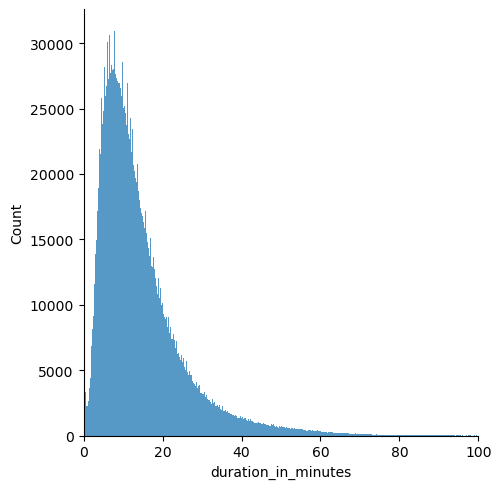

In [21]:
sns.displot(data = jan_df, x = 'duration_in_minutes')
plt.xlim(0,100)

In [29]:
jan_df[(jan_df['duration_in_minutes'] <= 60) & (jan_df['duration_in_minutes'] >= 1)].shape[0] / jan_df.shape[0]

0.9812202822125979

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
Fit a dictionary vectorizer
Get a feature matrix from it
What's the dimensionality of this matrix (number of columns)?

In [56]:
jan_df_no_outlier = jan_df[(jan_df['duration_in_minutes'] <= 60) & (jan_df['duration_in_minutes'] >= 1)]

In [32]:
jan_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration,duration_in_minutes
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50,10.833333


In [34]:
jan_df['PULocationID'].value_counts()

132    160030
237    148074
236    138391
161    135417
186    109227
        ...  
111         2
184         2
187         2
199         2
58          2
Name: PULocationID, Length: 257, dtype: int64

In [35]:
jan_df['DOLocationID'].value_counts()

236    146348
237    132364
161    116149
230     89878
170     88783
        ...  
187        17
84         16
204        14
99          5
105         1
Name: DOLocationID, Length: 261, dtype: int64

In [57]:
train_df = jan_df_no_outlier[['PULocationID','DOLocationID','duration_in_minutes']]

In [58]:
train_df

,PULocationID,DOLocationID,duration_in_minutes
0,161,141,8.433333
1,43,237,6.316667
2,48,238,12.750000
3,138,7,9.616667
4,107,79,10.833333
...,...,...,...
3066761,107,48,13.983333
3066762,112,75,19.450000
3066763,114,239,24.516667
3066764,230,79,13.000000


In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
enc = OneHotEncoder(handle_unknown='ignore')
X = train_df[['PULocationID','DOLocationID']]
X_onehot =  enc.fit_transform(X)

In [61]:
X_onehot.shape

(3009173, 515)

Now let's use the feature matrix from the previous step to train a model.

Train a plain linear regression model with default parameters, where duration is the response variable
Calculate the RMSE of the model on the training data


In [66]:
y_train = jan_df_no_outlier['duration_in_minutes'].values

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [68]:
lr_model = LinearRegression()

In [69]:
lr_model.fit(X_onehot,y_train)

LinearRegression()

In [70]:
y = lr_model.predict(X_onehot)

In [71]:
np.sqrt(mean_squared_error(y_pred=y, y_true = y_train))

7.649261937393173

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

In [73]:
feb_df = pd.read_parquet('yellow_tripdata_2023-02.parquet')

In [86]:
feb_df_no_outlier = feb_df[(feb_df['duration_in_minutes'] <= 60) & (feb_df['duration_in_minutes'] >= 1)]

In [74]:
feb_df['duration'] = feb_df['tpep_dropoff_datetime'] - feb_df['tpep_pickup_datetime']
feb_df['duration_in_minutes'] = feb_df['duration'].dt.total_seconds() / 60

In [87]:
X_test = feb_df_no_outlier[['PULocationID','DOLocationID']]
X_test_onehot = enc.transform(X_test)

In [91]:
y_test = feb_df_no_outlier['duration_in_minutes'].values

In [92]:
y_pred = lr_model.predict(X_test_onehot)

In [93]:
np.sqrt(mean_squared_error(y_pred=y_pred, y_true = y_test))

7.811817051216582